# Case Study: Finding a Path

In [1]:
R = { (1,2), (2,3), (1,3), (2,4), (4,5), (3, 6), (6, 1) }

In [2]:
import graphviz as gv

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    Nodes = { p[0] for p in R }.union({ p[1] for p in R })
    for n in Nodes:
        dot.node(str(n))
    for (x, y) in R:
        dot.edge(str(x), str(y))
    return dot

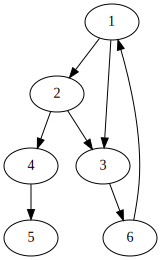

In [3]:
dot = dot_graph(R)
dot

In [4]:
dot.render('graph', view=True)  

'graph.pdf'

In [5]:
def product(R1, R2):
    "Compute the relational product of R1 and R2"
    return { (x, z) for (x, y1) in R1 for (y2, z) in R2 if y1 == y2 }

In [6]:
product(R, R)

{(1, 3), (1, 4), (1, 6), (2, 5), (2, 6), (3, 1), (6, 2), (6, 3)}

In [7]:
def transClosure(R):
    T = R
    while True:
        oldT = T
        T    = R.union(product(R,T))
        if T == oldT:
            return T

In [8]:
T = transClosure(R)

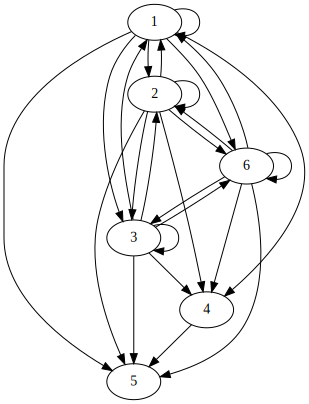

In [9]:
dot_graph(T)

In [10]:
def join(L1, L2):
    return L1 + L2[1:]

In [11]:
join( (1, 2, 3), (3, 4, 5))

(1, 2, 3, 4, 5)

In [12]:
def pathProduct(P, R):
    return { join(T1, T2) for T1 in P for T2 in R if T1[-1] == T2[0] and not T2[-1] in T1 }

In [13]:
pathProduct(R, R)

{(1, 2, 3),
 (1, 2, 4),
 (1, 3, 6),
 (2, 3, 6),
 (2, 4, 5),
 (3, 6, 1),
 (6, 1, 2),
 (6, 1, 3)}

In [14]:
def pathClosure(R):
    P = R
    while True:
        oldP = P
        P    = R.union(pathProduct(P, R))
        if P == oldP:
            return P

In [15]:
P = pathClosure(R)
P

{(1, 2),
 (1, 2, 3),
 (1, 2, 3, 6),
 (1, 2, 4),
 (1, 2, 4, 5),
 (1, 3),
 (1, 3, 6),
 (2, 3),
 (2, 3, 6),
 (2, 3, 6, 1),
 (2, 4),
 (2, 4, 5),
 (3, 6),
 (3, 6, 1),
 (3, 6, 1, 2),
 (3, 6, 1, 2, 4),
 (3, 6, 1, 2, 4, 5),
 (4, 5),
 (6, 1),
 (6, 1, 2),
 (6, 1, 2, 3),
 (6, 1, 2, 4),
 (6, 1, 2, 4, 5),
 (6, 1, 3)}